Code for solving the Express Air Cargo Operation Problem

In [1780]:
import numpy as np
import pandas as pd
from gurobipy import *
import matplotlib.pyplot as plt
import seaborn as sns

In [1701]:
# initiate cargo comes in for each day
Monday = np.array([[0,100,50],[25,0,25],[40,400,0]])
Tuesday = np.array([[0,200,50],[25,0,25],[40,200,0]])
Wednesday = np.array([[0,100,50],[25,0,25],[40,300,0]])
Thursday = np.array([[0,400,50],[25,0,25],[40,200,0]])
Friday = np.array([[0,300,50],[25,0,25],[40,400,0]])

In [1702]:
cargo_lst = [Monday, Tuesday, Wednesday, Thursday, Friday]

In [1703]:
cargo_lst

[array([[  0, 100,  50],
        [ 25,   0,  25],
        [ 40, 400,   0]]),
 array([[  0, 200,  50],
        [ 25,   0,  25],
        [ 40, 200,   0]]),
 array([[  0, 100,  50],
        [ 25,   0,  25],
        [ 40, 300,   0]]),
 array([[  0, 400,  50],
        [ 25,   0,  25],
        [ 40, 200,   0]]),
 array([[  0, 300,  50],
        [ 25,   0,  25],
        [ 40, 400,   0]])]

In [1704]:
# cost for empty repositioning flight
repositioning_cost = np.array([[0,7,3],[7,0,6],[3,6,0]])

In [1705]:
repositioning_cost

array([[0, 7, 3],
       [7, 0, 6],
       [3, 6, 0]])

In [1706]:
num_airports = 3
num_days = 5

In [1707]:
myVars = [[[0 for j in range (num_airports)] for i in range (num_airports)] for d in range(num_days)]

In [1708]:
#myVars

In [1709]:
airport_names = ['A','B','C']

In [1710]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [1711]:
# create a new model
myModel = Model("Express_Air")

# create decision variables and store them in the array myVars
# decision variables Xijt denote number of flights with cargos from airport i to airport j on day t
# Xijt is integer
myVars = [[[0 for j in range (num_airports)] for i in range (num_airports)] for t in range(num_days)]
for i in range(num_airports):
    for j in range(num_airports):
        for t in range(num_days):
            if i != j:
                curVar = myModel.addVar(vtype = GRB.INTEGER,
                                           name = "x" + airport_names[i] + airport_names[j] + str(t+1))
                myVars[t][i][j] = curVar

# integrate decision variables into the model
myModel.update()

In [1712]:
myVars

[[[0, <gurobi.Var xAB1>, <gurobi.Var xAC1>],
  [<gurobi.Var xBA1>, 0, <gurobi.Var xBC1>],
  [<gurobi.Var xCA1>, <gurobi.Var xCB1>, 0]],
 [[0, <gurobi.Var xAB2>, <gurobi.Var xAC2>],
  [<gurobi.Var xBA2>, 0, <gurobi.Var xBC2>],
  [<gurobi.Var xCA2>, <gurobi.Var xCB2>, 0]],
 [[0, <gurobi.Var xAB3>, <gurobi.Var xAC3>],
  [<gurobi.Var xBA3>, 0, <gurobi.Var xBC3>],
  [<gurobi.Var xCA3>, <gurobi.Var xCB3>, 0]],
 [[0, <gurobi.Var xAB4>, <gurobi.Var xAC4>],
  [<gurobi.Var xBA4>, 0, <gurobi.Var xBC4>],
  [<gurobi.Var xCA4>, <gurobi.Var xCB4>, 0]],
 [[0, <gurobi.Var xAB5>, <gurobi.Var xAC5>],
  [<gurobi.Var xBA5>, 0, <gurobi.Var xBC5>],
  [<gurobi.Var xCA5>, <gurobi.Var xCB5>, 0]]]

In [1713]:
# create decision variables Eijt denote empty flights from airport i to airport j on day t
E_Vars = [[[0 for j in range (num_airports)] for i in range (num_airports)] for t in range(num_days)]
for i in range(num_airports):
    for j in range(num_airports):
        for t in range(num_days):
            #if i != j:
                curVar = myModel.addVar(vtype = GRB.INTEGER,
                                           name = "E" + airport_names[i] + airport_names[j] + str(t+1))
                E_Vars[t][i][j] = curVar

# integrate decision variables into the model
myModel.update()

In [1714]:
E_Vars

[[[<gurobi.Var EAA1>, <gurobi.Var EAB1>, <gurobi.Var EAC1>],
  [<gurobi.Var EBA1>, <gurobi.Var EBB1>, <gurobi.Var EBC1>],
  [<gurobi.Var ECA1>, <gurobi.Var ECB1>, <gurobi.Var ECC1>]],
 [[<gurobi.Var EAA2>, <gurobi.Var EAB2>, <gurobi.Var EAC2>],
  [<gurobi.Var EBA2>, <gurobi.Var EBB2>, <gurobi.Var EBC2>],
  [<gurobi.Var ECA2>, <gurobi.Var ECB2>, <gurobi.Var ECC2>]],
 [[<gurobi.Var EAA3>, <gurobi.Var EAB3>, <gurobi.Var EAC3>],
  [<gurobi.Var EBA3>, <gurobi.Var EBB3>, <gurobi.Var EBC3>],
  [<gurobi.Var ECA3>, <gurobi.Var ECB3>, <gurobi.Var ECC3>]],
 [[<gurobi.Var EAA4>, <gurobi.Var EAB4>, <gurobi.Var EAC4>],
  [<gurobi.Var EBA4>, <gurobi.Var EBB4>, <gurobi.Var EBC4>],
  [<gurobi.Var ECA4>, <gurobi.Var ECB4>, <gurobi.Var ECC4>]],
 [[<gurobi.Var EAA5>, <gurobi.Var EAB5>, <gurobi.Var EAC5>],
  [<gurobi.Var EBA5>, <gurobi.Var EBB5>, <gurobi.Var EBC5>],
  [<gurobi.Var ECA5>, <gurobi.Var ECB5>, <gurobi.Var ECC5>]]]

In [1715]:
# create decisons variables Lijt denote unshipped cargo from airport i to airport j on day t
# create decision variables Eijt denote empty flights from airport i to airport j on day t
L_Vars = [[[0 for j in range (num_airports)] for i in range (num_airports)] for t in range(num_days)]
for i in range(num_airports):
    for j in range(num_airports):
        for t in range(num_days):
            if i != j:
                curVar = myModel.addVar(vtype = GRB.INTEGER,
                                           name = "L" + airport_names[i] + airport_names[j] + str(t+1))
                L_Vars[t][i][j] = curVar

# integrate decision variables into the model
myModel.update()

In [1716]:
L_Vars

[[[0, <gurobi.Var LAB1>, <gurobi.Var LAC1>],
  [<gurobi.Var LBA1>, 0, <gurobi.Var LBC1>],
  [<gurobi.Var LCA1>, <gurobi.Var LCB1>, 0]],
 [[0, <gurobi.Var LAB2>, <gurobi.Var LAC2>],
  [<gurobi.Var LBA2>, 0, <gurobi.Var LBC2>],
  [<gurobi.Var LCA2>, <gurobi.Var LCB2>, 0]],
 [[0, <gurobi.Var LAB3>, <gurobi.Var LAC3>],
  [<gurobi.Var LBA3>, 0, <gurobi.Var LBC3>],
  [<gurobi.Var LCA3>, <gurobi.Var LCB3>, 0]],
 [[0, <gurobi.Var LAB4>, <gurobi.Var LAC4>],
  [<gurobi.Var LBA4>, 0, <gurobi.Var LBC4>],
  [<gurobi.Var LCA4>, <gurobi.Var LCB4>, 0]],
 [[0, <gurobi.Var LAB5>, <gurobi.Var LAC5>],
  [<gurobi.Var LBA5>, 0, <gurobi.Var LBC5>],
  [<gurobi.Var LCA5>, <gurobi.Var LCB5>, 0]]]

In [1717]:
# create decison variables Si denote starting number of aircrafts at airport i on day 1
S_Vars = [0 for i in range (num_airports)]
for i in range(num_airports):
    curVar = myModel.addVar(vtype = GRB.INTEGER,
                               name = "S" + airport_names[i])
    S_Vars[i] = curVar

# integrate decision variables into the model
myModel.update()

In [1718]:
S_Vars

[<gurobi.Var SA>, <gurobi.Var SB>, <gurobi.Var SC>]

In [1719]:
# create a linear expression for the objective
objExpr = LinExpr()

# add all repositioning cost
for i in range(num_airports):
    for j in range(num_airports):
        for t in range(num_days):
            #if i != j:
                curVar = E_Vars[t][i][j]
                objExpr += repositioning_cost[i][j] * curVar
                
# add all landing cargo cost:
for i in range(num_airports):
    for j in range(num_airports):
        for t in range(num_days):
            if i != j:
                curVar = L_Vars[t][i][j]
                objExpr += 10 * curVar

myModel.setObjective(objExpr, GRB.MINIMIZE)

In [1720]:
objExpr

<gurobi.LinExpr: 0.0 EAA1 + 0.0 EAA2 + 0.0 EAA3 + 0.0 EAA4 + 0.0 EAA5 + 7.0 EAB1 + 7.0 EAB2 + 7.0 EAB3 + 7.0 EAB4 + 7.0 EAB5 + 3.0 EAC1 + 3.0 EAC2 + 3.0 EAC3 + 3.0 EAC4 + 3.0 EAC5 + 7.0 EBA1 + 7.0 EBA2 + 7.0 EBA3 + 7.0 EBA4 + 7.0 EBA5 + 0.0 EBB1 + 0.0 EBB2 + 0.0 EBB3 + 0.0 EBB4 + 0.0 EBB5 + 6.0 EBC1 + 6.0 EBC2 + 6.0 EBC3 + 6.0 EBC4 + 6.0 EBC5 + 3.0 ECA1 + 3.0 ECA2 + 3.0 ECA3 + 3.0 ECA4 + 3.0 ECA5 + 6.0 ECB1 + 6.0 ECB2 + 6.0 ECB3 + 6.0 ECB4 + 6.0 ECB5 + 0.0 ECC1 + 0.0 ECC2 + 0.0 ECC3 + 0.0 ECC4 + 0.0 ECC5 + 10.0 LAB1 + 10.0 LAB2 + 10.0 LAB3 + 10.0 LAB4 + 10.0 LAB5 + 10.0 LAC1 + 10.0 LAC2 + 10.0 LAC3 + 10.0 LAC4 + 10.0 LAC5 + 10.0 LBA1 + 10.0 LBA2 + 10.0 LBA3 + 10.0 LBA4 + 10.0 LBA5 + 10.0 LBC1 + 10.0 LBC2 + 10.0 LBC3 + 10.0 LBC4 + 10.0 LBC5 + 10.0 LCA1 + 10.0 LCA2 + 10.0 LCA3 + 10.0 LCA4 + 10.0 LCA5 + 10.0 LCB1 + 10.0 LCB2 + 10.0 LCB3 + 10.0 LCB4 + 10.0 LCB5 + 0.0 xAB1 + 0.0 xAB2 + 0.0 xAB3 + 0.0 xAB4 + 0.0 xAB5 + 0.0 xAC1 + 0.0 xAC2 + 0.0 xAC3 + 0.0 xAC4 + 0.0 xAC5 + 0.0 xBA1 + 0.0 xBA

In [1721]:
# create constraint so that total number of outflow for airport i at time 1 is equal to starting number Si 
for i in range(num_airports):
    constExpr = LinExpr()
    for j in range(num_airports):
        # out of node
        curVar = myVars[0][i][j]
        constExpr += 1*curVar
        #if i != j:
        curVar1 = E_Vars[0][i][j]
        constExpr += 1*curVar1
        
    myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = S_Vars[i], name = "Monday"+ 'airport'+ airport_names[i])
    
myModel.update()

In [1722]:
# create constraint so that total number of outflow for airport i at time t is equal to inflow for airport i at time t 
for i in range(num_airports):
    for t in range(1,num_days):
        constExpr = LinExpr()
        for j in range(num_airports):
            # out of node
            curVar = myVars[t][i][j]
            constExpr += 1*curVar
            #if i != j:
            curVar1 = E_Vars[t][i][j]
            constExpr += 1*curVar1
            curVar2 = myVars[t-1][j][i]
            constExpr -= curVar2
            #if i != j:
            curVar3 = E_Vars[t-1][j][i]
            constExpr -= curVar3

        myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = 0, name = days[t] + 'airport' + airport_names[i])
    
myModel.update()

In [1723]:
# create constraint so that total number of inflow for airport i at time 5 is equal to starting number Si 
for i in range(num_airports):
    constExpr = LinExpr()
    for j in range(num_airports):
        # out of node
        curVar = myVars[4][j][i]
        constExpr += 1*curVar
        #if i != j:
        curVar1 = E_Vars[4][j][i]
        constExpr += 1*curVar1
        
    myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = S_Vars[i], name = "EndofWeek"+ 'airport'+ airport_names[i])
    
myModel.update()

In [1724]:
# create constraint so that total number of flights is 1200
constExpr = LinExpr()
for i in range(num_airports):
    curVar = S_Vars[i]
    constExpr += 1*curVar
        
myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = 1200, name = "NumberofAircrafts")
    
myModel.update()

In [1725]:
# Create constraint so that number of landing cargos equals amount need to be shipped minus amount really shipped
# for Monday
for i in range(num_airports):
    for j in range(num_airports):
        if i != j:
            constExpr1 = LinExpr()
            constExpr2 = LinExpr()
            curVar = L_Vars[0][i][j]
            curVar0 = L_Vars[4][i][j]
            curVar1 = cargo_lst[0][i][j]
            curVar2 = myVars[0][i][j]
            constExpr1 += 1*curVar - 1*curVar0 + 1*curVar2
            constExpr2 += 1*curVar1
            myModel.addConstr(lhs = constExpr1, sense = GRB.EQUAL, rhs = constExpr2, name = 'StartLandingCargos'+'Monday'+airport_names[i]+airport_names[j])

In [1726]:
# for Tues,Weds,Thurs
for i in range(num_airports):
    for j in range(num_airports):
        for t in range(1, num_days):
            if i != j:
                constExpr1 = LinExpr()
                constExpr2 = LinExpr()
                curVar = L_Vars[t][i][j]
                curVar0 = L_Vars[t-1][i][j]
                curVar1 = cargo_lst[t][i][j]
                curVar2 = myVars[t][i][j]
                constExpr1 += 1*curVar - 1*curVar0 + 1*curVar2
                constExpr2 += 1*curVar1
                myModel.addConstr(lhs = constExpr1, sense = GRB.EQUAL, rhs = constExpr2, name = 'LandingCargos'+days[t]+airport_names[i]+airport_names[j])
# for Friday
'''
for i in range(num_airports):
    for j in range(num_airports):
        if i != j:
            constExpr = LinExpr()
            curVar = L_Vars[4][i][j]
            constExpr += 1*curVar
            myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = 0, name = 'FinalLandingCargos'+days[t]+airport_names[i]+airport_names[j])
'''
 

"\nfor i in range(num_airports):\n    for j in range(num_airports):\n        if i != j:\n            constExpr = LinExpr()\n            curVar = L_Vars[4][i][j]\n            constExpr += 1*curVar\n            myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = 0, name = 'FinalLandingCargos'+days[t]+airport_names[i]+airport_names[j])\n"

In [1727]:
'''
# sum delivered equals sum need to be delivered 
for i in range(num_airports):
    for j in range(num_airports):
        if i != j:
            constExpr = LinExpr()
            for t in range(num_days):
                # out of node
                curVar = myVars[t][i][j]
                constExpr += 1*curVar
                curVar1 = cargo_lst[t][i][j]
                constExpr -= 1*curVar1

            myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = 0, name = 'cargo' + airport_names[i]+airport_names[j])

myModel.update()
'''

"\n# sum delivered equals sum need to be delivered \nfor i in range(num_airports):\n    for j in range(num_airports):\n        if i != j:\n            constExpr = LinExpr()\n            for t in range(num_days):\n                # out of node\n                curVar = myVars[t][i][j]\n                constExpr += 1*curVar\n                curVar1 = cargo_lst[t][i][j]\n                constExpr -= 1*curVar1\n\n            myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = 0, name = 'cargo' + airport_names[i]+airport_names[j])\n\nmyModel.update()\n"

In [1728]:
'''
# each time delivered must be less than or equal to current amount of cargos
for i in range(num_airports):
    for j in range(num_airports):
        if i != j:
            for t in range(1,num_days):
                constExpr1 = LinExpr()
                constExpr2 = LinExpr()
                # out of node
                curVar = myVars[t][i][j]
                constExpr1 += 1*curVar
                curVar1 = cargo_lst[t][i][j]
                constExpr2 += 1*curVar1
                curVar2 = L_Vars[t-1][i][j]
                constExpr2 += 1*curVar2

                myModel.addConstr(lhs = constExpr1, sense = GRB.LESS_EQUAL, rhs = constExpr2, name = 'Capacity' + airport_names[i]+airport_names[j]+days[t])

myModel.update()
'''

"\n# each time delivered must be less than or equal to current amount of cargos\nfor i in range(num_airports):\n    for j in range(num_airports):\n        if i != j:\n            for t in range(1,num_days):\n                constExpr1 = LinExpr()\n                constExpr2 = LinExpr()\n                # out of node\n                curVar = myVars[t][i][j]\n                constExpr1 += 1*curVar\n                curVar1 = cargo_lst[t][i][j]\n                constExpr2 += 1*curVar1\n                curVar2 = L_Vars[t-1][i][j]\n                constExpr2 += 1*curVar2\n\n                myModel.addConstr(lhs = constExpr1, sense = GRB.LESS_EQUAL, rhs = constExpr2, name = 'Capacity' + airport_names[i]+airport_names[j]+days[t])\n\nmyModel.update()\n"

In [1729]:
cargo_lst[1][2][1]

200

In [1730]:
# write the model in a file to make sure it is constructed correctly
myModel.write(filename = "Express_Air.lp")

In [1731]:
# optimize the model
myModel.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 49 rows, 108 columns and 249 nonzeros
Model fingerprint: 0xcedfc35f
Variable types: 0 continuous, 108 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 1e+03]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 48 rows, 107 columns, 248 nonzeros
Variable types: 0 continuous, 107 integer (0 binary)

Root relaxation: objective 1.792500e+04, 25 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    17925.000000 17925.0000  0.00%     -    0s

Explored 1 nodes (25 simplex iterations) in 0.02 seconds (0.00 work units)
Thread cou

In [1732]:
# print optimal objective and optimal solution
print("\nOptimal Objective: " + str(myModel.ObjVal))
print("\nOptimal Solution:")
allVars = myModel.getVars()
for curVar in allVars:
    print(curVar.varName + " " + str(curVar.x))


Optimal Objective: 17925.0

Optimal Solution:
xAB1 200.0
xAB2 290.0
xAB3 100.0
xAB4 400.0
xAB5 110.0
xAC1 50.0
xAC2 50.0
xAC3 50.0
xAC4 50.0
xAC5 50.0
xBA1 25.0
xBA2 25.0
xBA3 25.0
xBA4 25.0
xBA5 25.0
xBC1 25.0
xBC2 25.0
xBC3 25.0
xBC4 25.0
xBC5 25.0
xCA1 40.0
xCA2 40.0
xCA3 40.0
xCA4 40.0
xCA5 40.0
xCB1 400.0
xCB2 200.0
xCB3 300.0
xCB4 200.0
xCB5 400.0
EAA1 -0.0
EAA2 -0.0
EAA3 220.0
EAA4 -0.0
EAA5 -0.0
EAB1 -0.0
EAB2 -0.0
EAB3 -0.0
EAB4 -0.0
EAB5 -0.0
EAC1 -0.0
EAC2 -0.0
EAC3 -0.0
EAC4 -0.0
EAC5 -0.0
EBA1 275.0
EBA2 305.0
EBA3 165.0
EBA4 95.0
EBA5 185.0
EBB1 -0.0
EBB2 -0.0
EBB3 -0.0
EBB4 -0.0
EBB5 -0.0
EBC1 185.0
EBC2 245.0
EBC3 275.0
EBC4 255.0
EBC5 365.0
ECA1 -0.0
ECA2 -0.0
ECA3 -0.0
ECA4 -0.0
ECA5 -0.0
ECB1 -0.0
ECB2 -0.0
ECB3 -0.0
ECB4 -0.0
ECB5 -0.0
ECC1 -0.0
ECC2 20.0
ECC3 -0.0
ECC4 110.0
ECC5 -0.0
LAB1 90.0
LAB2 -0.0
LAB3 -0.0
LAB4 -0.0
LAB5 190.0
LAC1 -0.0
LAC2 -0.0
LAC3 -0.0
LAC4 -0.0
LAC5 -0.0
LBA1 -0.0
LBA2 -0.0
LBA3 -0.0
LBA4 -0.0
LBA5 -0.0
LBC1 -0.0
LBC2 -0.0
LBC3 -0.0
L

In [1733]:
decision_variables = [y.x for y in allVars]

In [1734]:
Xijt = np.array(decision_variables[:30]).reshape(6,5)

In [1735]:
Xijt

array([[200., 290., 100., 400., 110.],
       [ 50.,  50.,  50.,  50.,  50.],
       [ 25.,  25.,  25.,  25.,  25.],
       [ 25.,  25.,  25.,  25.,  25.],
       [ 40.,  40.,  40.,  40.,  40.],
       [400., 200., 300., 200., 400.]])

In [1736]:
Eijt = np.array(decision_variables[30:75]).reshape(9,5)

In [1737]:
Eijt

array([[ -0.,  -0., 220.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [275., 305., 165.,  95., 185.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [185., 245., 275., 255., 365.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  20.,  -0., 110.,  -0.]])

In [1738]:
Lijt = np.array(decision_variables[75:105]).reshape(6,5)

In [1739]:
Lijt

array([[ 90.,  -0.,  -0.,  -0., 190.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.]])

In [1740]:
S_ = np.array(decision_variables[105:]).reshape(3,1)

In [1741]:
S_

array([[250.],
       [510.],
       [440.]])

In [1746]:
myModel.ObjVal

17925.0

In [1774]:
def get_optimal_value(fleet_size):
    # create a new model
    myModel = Model("Express_Air")

    # create decision variables and store them in the array myVars
    # decision variables Xijt denote number of flights with cargos from airport i to airport j on day t
    # Xijt is integer
    myVars = [[[0 for j in range (num_airports)] for i in range (num_airports)] for t in range(num_days)]
    for i in range(num_airports):
        for j in range(num_airports):
            for t in range(num_days):
                if i != j:
                    curVar = myModel.addVar(vtype = GRB.INTEGER,
                                               name = "x" + airport_names[i] + airport_names[j] + str(t+1))
                    myVars[t][i][j] = curVar

    # integrate decision variables into the model
    myModel.update()
    
    # create decision variables Eijt denote empty flights from airport i to airport j on day t
    E_Vars = [[[0 for j in range (num_airports)] for i in range (num_airports)] for t in range(num_days)]
    for i in range(num_airports):
        for j in range(num_airports):
            for t in range(num_days):
                #if i != j:
                    curVar = myModel.addVar(vtype = GRB.INTEGER,
                                               name = "E" + airport_names[i] + airport_names[j] + str(t+1))
                    E_Vars[t][i][j] = curVar

    # integrate decision variables into the model
    myModel.update()
    
    # create decisons variables Lijt denote unshipped cargo from airport i to airport j on day t
    # create decision variables Eijt denote empty flights from airport i to airport j on day t
    L_Vars = [[[0 for j in range (num_airports)] for i in range (num_airports)] for t in range(num_days)]
    for i in range(num_airports):
        for j in range(num_airports):
            for t in range(num_days):
                if i != j:
                    curVar = myModel.addVar(vtype = GRB.INTEGER,
                                               name = "L" + airport_names[i] + airport_names[j] + str(t+1))
                    L_Vars[t][i][j] = curVar

    # integrate decision variables into the model
    myModel.update()
    
    # create decison variables Si denote starting number of aircrafts at airport i on day 1
    S_Vars = [0 for i in range (num_airports)]
    for i in range(num_airports):
        curVar = myModel.addVar(vtype = GRB.INTEGER,
                                   name = "S" + airport_names[i])
        S_Vars[i] = curVar

    # integrate decision variables into the model
    myModel.update()
    
    # create a linear expression for the objective
    objExpr = LinExpr()

    # add all repositioning cost
    for i in range(num_airports):
        for j in range(num_airports):
            for t in range(num_days):
                #if i != j:
                    curVar = E_Vars[t][i][j]
                    objExpr += repositioning_cost[i][j] * curVar

    # add all landing cargo cost:
    for i in range(num_airports):
        for j in range(num_airports):
            for t in range(num_days):
                if i != j:
                    curVar = L_Vars[t][i][j]
                    objExpr += 10 * curVar

    myModel.setObjective(objExpr, GRB.MINIMIZE)
    
    # create constraint so that total number of outflow for airport i at time 1 is equal to starting number Si 
    for i in range(num_airports):
        constExpr = LinExpr()
        for j in range(num_airports):
            # out of node
            curVar = myVars[0][i][j]
            constExpr += 1*curVar
            #if i != j:
            curVar1 = E_Vars[0][i][j]
            constExpr += 1*curVar1

        myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = S_Vars[i], name = "Monday"+ 'airport'+ airport_names[i])

    myModel.update()
    
    # create constraint so that total number of outflow for airport i at time t is equal to inflow for airport i at time t 
    for i in range(num_airports):
        for t in range(1,num_days):
            constExpr = LinExpr()
            for j in range(num_airports):
                # out of node
                curVar = myVars[t][i][j]
                constExpr += 1*curVar
                #if i != j:
                curVar1 = E_Vars[t][i][j]
                constExpr += 1*curVar1
                curVar2 = myVars[t-1][j][i]
                constExpr -= curVar2
                #if i != j:
                curVar3 = E_Vars[t-1][j][i]
                constExpr -= curVar3

            myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = 0, name = days[t] + 'airport' + airport_names[i])

    myModel.update()
    
    # create constraint so that total number of inflow for airport i at time 5 is equal to starting number Si 
    for i in range(num_airports):
        constExpr = LinExpr()
        for j in range(num_airports):
            # out of node
            curVar = myVars[4][j][i]
            constExpr += 1*curVar
            #if i != j:
            curVar1 = E_Vars[4][j][i]
            constExpr += 1*curVar1

        myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = S_Vars[i], name = "EndofWeek"+ 'airport'+ airport_names[i])

    myModel.update()
    
    # create constraint so that total number of flights is 1200
    constExpr = LinExpr()
    for i in range(num_airports):
        curVar = S_Vars[i]
        constExpr += 1*curVar

    myModel.addConstr(lhs = constExpr, sense = GRB.EQUAL, rhs = fleet_size, name = "NumberofAircrafts")

    myModel.update()
    
    # Create constraint so that number of landing cargos equals amount need to be shipped minus amount really shipped
    # for Monday
    for i in range(num_airports):
        for j in range(num_airports):
            if i != j:
                constExpr1 = LinExpr()
                constExpr2 = LinExpr()
                curVar = L_Vars[0][i][j]
                curVar0 = L_Vars[4][i][j]
                curVar1 = cargo_lst[0][i][j]
                curVar2 = myVars[0][i][j]
                constExpr1 += 1*curVar - 1*curVar0 + 1*curVar2
                constExpr2 += 1*curVar1
                myModel.addConstr(lhs = constExpr1, sense = GRB.EQUAL, rhs = constExpr2, name = 'StartLandingCargos'+'Monday'+airport_names[i]+airport_names[j])
    
    # for Tues,Weds,Thurs
    for i in range(num_airports):
        for j in range(num_airports):
            for t in range(1, num_days):
                if i != j:
                    constExpr1 = LinExpr()
                    constExpr2 = LinExpr()
                    curVar = L_Vars[t][i][j]
                    curVar0 = L_Vars[t-1][i][j]
                    curVar1 = cargo_lst[t][i][j]
                    curVar2 = myVars[t][i][j]
                    constExpr1 += 1*curVar - 1*curVar0 + 1*curVar2
                    constExpr2 += 1*curVar1
                    myModel.addConstr(lhs = constExpr1, sense = GRB.EQUAL, rhs = constExpr2, name = 'LandingCargos'+days[t]+airport_names[i]+airport_names[j])
    
    # optimize the model
    myModel.optimize()
    
    if myModel.status == GRB.OPTIMAL:
        return myModel.ObjVal
    else:
        return 20000
    

In [1775]:
fleet_size = range(1100,1500,1)

In [ ]:
all_optimal_soln = []

for n in fleet_size:
    all_optimal_soln.append(get_optimal_value(n))

In [1792]:
my_df = pd.DataFrame({"fleet_size":fleet_size,"all_optimal_soln":all_optimal_soln})

In [1814]:
my_df.head()

,fleet_size,all_optimal_soln,optimal_1st_diff
0,1100,20000.0,NaN
1,1101,20000.0,0.0
2,1102,20000.0,0.0
3,1103,20000.0,0.0
4,1104,20000.0,0.0


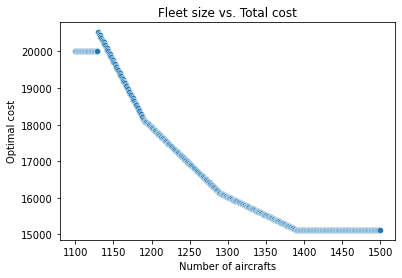

In [1800]:
sns.scatterplot(x="fleet_size", y="all_optimal_soln", data=my_df)
plt.xlabel('Number of aircrafts')
plt.ylabel('Optimal cost')
plt.title('Fleet size vs. Total cost')
plt.show()

In [1801]:
my_df['optimal_1st_diff'] = my_df['all_optimal_soln'].diff()

In [1802]:
my_df.head()

,fleet_size,all_optimal_soln,optimal_1st_diff
0,1100,20000.0,NaN
1,1101,20000.0,0.0
2,1102,20000.0,0.0
3,1103,20000.0,0.0
4,1104,20000.0,0.0


In [1805]:
np.argmax(my_df['optimal_1st_diff'])

/Users/houruize/anaconda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


30

In [1809]:
my_df.loc[30]

fleet_size           1130.0
all_optimal_soln    20525.0
optimal_1st_diff      525.0
Name: 30, dtype: float64

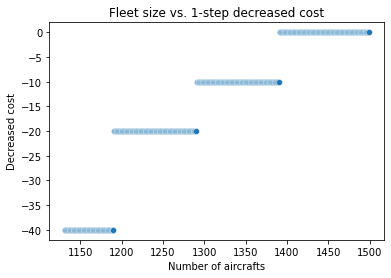

In [1815]:
sns.scatterplot(x="fleet_size", y="optimal_1st_diff", data=my_df[31:])
plt.xlabel('Number of aircrafts')
plt.ylabel('Decreased cost')
plt.title('Fleet size vs. 1-step decreased cost')
plt.show()

In [1779]:
#dir(myModel)

In [1762]:
myModel.Status

2

In [1763]:
GRB.OPTIMAL

2